<a href="https://colab.research.google.com/github/Followb1ind1y/D2L_Pytorch_Study_Notes/blob/main/04_D2L_Linear_Neural_Networks_for_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dive into Deep Learning 中文学习笔记**
# **4. 用于分类的线性神经网络（Linear Neural Networks for Classification）**

## **4.1. Softmax回归 （Softmax Regression）**

### **4.1.1. 分类问题（Classification）**

让我们考虑一个简单的图像分类问题，其输入图像的高和宽均为2像素，且色彩为灰度。这样每个像素值都可以用一个标量表示。我们将图像中的 4 像素分别记为 $x_{1},x_{2},x_{3},x_{4}$ 。假设训练数据集中图像的真实标签为狗、猫或鸡（假设可以用4像素表示出这3种动物），这些标签分别对应离散值$y_{1},y_{2},y_{3}$。

我们通常使用离散的数值来表示类别，例如 $y_{1}=1,y_{2}=2,y_{3}=3$。如此，一张图像的标签为1、2 和 3 这 3 个数值中的一个。虽然我们仍然可以使用回归模型来进行建模，并将预测值就近定点化到1、2 和 3 这3个离散值之一，但这种连续值到离散值的转化通常会影响到分类质量。因此我们一般使用更加适合离散值输出的模型来解决分类问题。

一般来说，分类问题并不伴随着类别之间的自然排序。幸运的是，统计学家很早就发明了一种表示分类数据的简单方法：**独热编码（*one-hot encoding*）**。独热编码是一个具有与我们的类别一样多的分量的向量。在我们的例子中，一个标签 $y$ 将是一个三维向量，其中 $(1, 0, 0)$ 对应于 "猫"， $(0, 1, 0)$ 对应于 "鸡"，而 $(0, 0, 1)$ 对应于 "狗"。

$$y \in \{(1, 0, 0), (0, 1, 0), (0, 0, 1)\}.$$

**4.1.1.1. 线性模型（Linear Model）**

softmax 回归跟线性回归一样将输入特征与权重做线性叠加。与线性回归的一个主要不同在于，softmax 回归的**输出值个数等于标签里的类别数**。因为一共有4种特征和3种输出动物类别，所以权重包含 12 个标量（带下标的 $w$）、偏差包含 3 个标量（带下标的 $b$），且对每个输入计算 $o_{1},o_{2},o_{3}$ 这 3 个输出：

$$
\begin{aligned}
o_1 &= x_1 w_{11} + x_2 w_{12} + x_3 w_{13} + x_4 w_{14} + b_1,\\
o_2 &= x_1 w_{21} + x_2 w_{22} + x_3 w_{23} + x_4 w_{24} + b_2,\\
o_3 &= x_1 w_{31} + x_2 w_{32} + x_3 w_{33} + x_4 w_{34} + b_3.
\end{aligned}
$$

softmax回归同线性回归一样，也是一个单层神经网络。由于每个输出 $o_{1},o_{2},o_{3}$ 的计算都要依赖于所有的输入 $x_{1},x_{2},x_{3},x_{4}$，softmax 回归的输出层也是一个 **全连接层（*fully connected layer*）**。

<center><img src="https://drive.google.com/uc?export=view&id=11XSSTN2oC4wIboGgNdbR1Bh0laCFw5RL" width=450px /></center>


为了更简洁的记号，我们使用向量和矩阵。$\mathbf{o} = \mathbf{W} \mathbf{x} + \mathbf{b}$ 更适用于数学和代码。请注意，我们把所有的权重都集中到一个 $\mathbf{o} = \mathbf{W} \mathbf{x} + \mathbf{b}$ 的矩阵中，把所有的偏差 $\mathbf{b} \in \mathbb{R}^3$ 集中到一个向量中。

**4.1.1.2. Softmax函数（The Softmax）**

虽然事实证明，将分类作为一个向量值回归问题，效果出奇的好，但它还是有以下不足之处：

* 不能保证 输出 $o_i$ 的总和为1，而这是我们期望的概率的表现。
* 不能保证输出 $o_i$ 甚至是非负的，即使它们的输出相加为1，或者不超过1。

实现这一目标（并确保非负性）的一种方法是使用指数函数 $P(y = i) \propto \exp o_i$。这确实满足了条件类概率随着 $o_i$ 的增加而增加的要求，它是单调的，而且所有概率都是非负的。然后，我们可以通过将这些值除以它们的总和，使它们加起来等于1。这个过程被称为 **归一化（*normalization*）**。把这两部分放在一起，我们就得到了 Softmax 函数：

$$\hat{\mathbf{y}} = \mathrm{softmax}(\mathbf{o}) \quad \text{where}\quad \hat{y}_i = \frac{\exp(o_i)}{\sum_j \exp(o_j)}.$$

请注意，$o$ 的最大坐标对应于根据 $\hat{y}$ 的最大可能的类别。此外，由于 softmax 操作保留了其参数之间的排序，我们不需要计算 softmax 来确定哪个类被分配了最高的概率。

$$\operatorname*{argmax}_j \hat y_j = \operatorname*{argmax}_j o_j$$

**4.1.1.3. 矢量化（Vectorization）**

为了提高计算效率，我们可以将单样本分类通过矢量计算来表达。在上面的图像分类问题中，假设softmax回归的权重和偏差参数分别为

$$
W = 
\begin{bmatrix}
    w_{11} & w_{12} & w_{13} \\
    w_{21} & w_{22} & w_{23} \\
    w_{31} & w_{32} & w_{33} \\
    w_{41} & w_{42} & w_{43}
\end{bmatrix},\quad
b = 
\begin{bmatrix}
    b_1 & b_2 & b_3
\end{bmatrix},
$$

设高和宽分别为2个像素的图像样本 $i$ 的特征为

$$x^{(i)} = \begin{bmatrix}x_1^{(i)} & x_2^{(i)} & x_3^{(i)} & x_4^{(i)}\end{bmatrix},$$

输出层的输出为

$${o}^{(i)} = \begin{bmatrix}o_1^{(i)} & o_2^{(i)} & o_3^{(i)}\end{bmatrix},$$

预测为狗、猫或鸡的概率分布为

$$\hat{y}^{(i)} = \begin{bmatrix}\hat{y}_1^{(i)} & \hat{y}_2^{(i)} & \hat{y}_3^{(i)}\end{bmatrix}.$$


softmax 回归对样本 $i$ 分类的矢量计算表达式为

$$ \begin{aligned} o^{(i)} &= x^{(i)} \mathbf{W} + b, \\ \hat{y}^{(i)} & = \mathrm{softmax}(o^{(i)}). \end{aligned} $$

### **4.1.2. 损失函数（Loss Function）**

现在我们有一个从特征 $x$ 到概率 $\hat{y}$ 的映射，我们需要一种方法来优化这个映射的准确性。我们将依靠 **最大似然估计（*maximum likelihood estimation*）**，这与我们在为平均平方误差损失提供概率性理由时遇到的概念相同。

**4.1.2.1. 对数似然方程（Log-Likelihood）**

Softmax 函数给出了一个向量 $\hat{\mathbf{y}}$，我们可以将其解释为在任何输入 $\mathbf{x}$ 的情况下，每个类别的（估计）条件概率，例如 $\hat{y}_1$ = $P(y=\text{cat} \mid \mathbf{x})$。我们假设对于一个具有特征 $\mathbf{X}$ 的数据集，标签 $\mathbf{Y}$ 是用一个独热编码的标签向量来表示。我们可以通过检查在给定特征的情况下，根据我们的模型，实际类别的可能性有多大来比较估计值和现实。

$$
P(\mathbf{Y} \mid \mathbf{X}) = \prod_{i=1}^n P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)}).
$$

我们被允许使用因子化，因为我们假设每个标签是独立地从其各自的分布  $P(\mathbf{y}\mid\mathbf{x}^{(i)})$ 中抽取的。由于最大化项的乘积是很尴尬的，我们采取负对数的方式来得到最小化负对数可能性的等效问题。

$$
-\log P(\mathbf{Y} \mid \mathbf{X}) = \sum_{i=1}^n -\log P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)})
= \sum_{i=1}^n l(\mathbf{y}^{(i)}, \hat{\mathbf{y}}^{(i)}),
$$

其中，对于任何一对标签 $\mathbf{y}$ 和模型预测 $\hat{\mathbf{y}}$ 在 $q$ 类上，损失函数 $l$ 为

$$ l(\mathbf{y}, \hat{\mathbf{y}}) = - \sum_{j=1}^q y_j \log \hat{y}_j. $$

这个损失函数通常被称为 **交叉熵损失（*cross-entropy loss*）**。其中 $y_{j}$ 为非 0 即 1 的元素，并且其中只有一个元素为 1， 其余全为 0。也就是说，**交叉熵只关心对正确类别的预测概率**，因为只要其值足够大，就可以确保分类结果正确。**最小化交叉熵损失函数等价于最大化训练数据集所有标签类别的联合预测概率**。


**4.1.2.2. Softmax 函数和交叉熵损失（Softmax and Cross-Entropy Loss）**

将 softmax 插入交叉熵损失，并使用 softmax 的定义，我们得到了：

$$
\begin{aligned}
l(\mathbf{y}, \hat{\mathbf{y}}) &=  - \sum_{j=1}^q y_j \log \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} \\
&= \sum_{j=1}^q y_j \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j \\
&= \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j.
\end{aligned}
$$

### **4.1.3. 信息论基础知识（Information Theory Basics）**

**信息理论（*Information theory*）**处理的是编码、解码、传输和操纵信息（也称为数据）的问题。

**4.1.3.1. 熵（Entropy）**

信息理论的核心思想是**量化数据中包含的信息量**。这给我们压缩数据的能力带来了限制。对于一个分布 $P$，其 **熵（*entropy*）** 定义为：

$$H[P] = \sum_j - P(j) \log P(j).$$


**4.1.3.2. 惊讶值（Surprisal）**

想象一下，我们有一个我们想要压缩的数据流。如果我们总是很容易预测下一个事件，那么这个数据就很容易压缩。

然而，如果我们不能完美地预测每个事件，那么我们有时可能会感到惊讶。当被我们赋予较低概率的一个事件发生时，我们的惊讶会更大。Claude Shannon 用 $\log \frac{1}{P(j)} = -\log P(j)$ 来量化在观察到一个事件 $j$ 时的 **惊讶程度（*surprisal*）**，他给它分配了一个（主观的）概率 $P(j)$。那么，熵就是当人们分配了真正符合数据生成过程的正确概率时的 **预期惊讶值（*expected surprisal*）**。

**4.1.3.3. 重新审视交叉熵（Cross-Entropy Revisited）**

从 $P$ 到 $Q$ 的交叉熵，表示为 $H(P, Q)$，是具有主观概率 $Q$ 的观察者在看到根据概率 $P$ 实际生成的数据时的预期惊讶值。这由  $H(P, Q) \stackrel{\mathrm{def}}{=} \sum_j - P(j) \log Q(j)$ 得出。当 $P=Q$ 时，交叉熵达到最低可能。在这种情况下，从 $P$ 到 $Q$ 的交叉熵是 $H(P, P)= H(P)$ 。

简而言之，我们可以从两个方面来考虑交叉熵分类的目标：(i) 将观察到的数据的可能性最大化；(ii) 将我们传达标签所需的惊讶程度（以及由此产生的比特数）最小化。

## **4.2. 图像分类数据集（The Image Classification Dataset）**

### **4.2.1. 加载数据集（Loading the Dataset）**

In [ ]:
%matplotlib inline
import time
import torch
import torchvision
from torch import nn
from torch.nn import functional as F
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

In [3]:
class FashionMNIST(d2l.DataModule):
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)

`Fashion-MNIST` 由 10 个类别的图像组成，每个类别在训练数据集中由 6,000 张图像代表，在测试数据集中由 1,000 张代表。测试数据集被用来评估模型的性能（它不能被用来训练）。因此，训练集和测试集分别包含 60,000 和 10,000 张图像。

In [ ]:
data = FashionMNIST(resize=(32, 32))

In [5]:
len(data.train), len(data.val)

(60000, 10000)

这些图像是灰度的，并在上面的分辨率中放大到 $32 \times 32$ 像素。这与最初的 `MNIST` 数据集相似，后者由（二进制）黑白图像组成。但请注意，大多数现代图像数据有 3 个通道（红、绿、蓝），高光谱图像可以有超过 100 个通道。按照惯例，我们将图像存储为一个 $c \times h \times w$ 张量，其中 $c$ 是颜色通道的数量，$h$ 是高度，$w$ 是宽度。


In [6]:
data.train[0][0].shape

torch.Size([1, 32, 32])

`Fashion-MNIST` 的类别有人类可以理解的名称。下面的函数将数字标签和其名称之间进行转换。

In [7]:
@d2l.add_to_class(FashionMNIST)
def text_labels(self, indices):
    """Return text labels."""
    labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [labels[int(i)] for i in indices]

### **4.2.2. 读取一个迷你批次（Reading a Minibatch）**

为了使我们在读取训练集和测试集时更容易，我们使用内置的数据迭代器，而不是从头开始创建一个。回顾一下，在每次迭代中，数据迭代器都会读取一个大小为 `batch_size` 的迷你批数据。我们还为训练数据迭代器随机地打乱了一下输入图片。在实践中，数据读取经常是训练的性能瓶颈，特别当模型较简单或者计算硬件性能较高时。PyTorch 的 `DataLoader` 中一个很方便的功能是允许使用多进程来加速数据读取。这里我们通过参数 `num_workers` 来设置4个进程读取数据。

In [8]:
@d2l.add_to_class(FashionMNIST)
def get_dataloader(self, train):
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=self.num_workers)

In [ ]:
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

In [10]:
tic = time.time()
for X, y in data.train_dataloader():
    continue
f'{time.time() - tic:.2f} sec'

'12.45 sec'

### **4.2.3. 可视化（Visualization）**

In [11]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """Plot a list of images."""
    raise NotImplementedError

In [ ]:
@d2l.add_to_class(FashionMNIST)
def visualize(self, batch, nrows=1, ncols=8, labels=[]):
    X, y = batch
    if not labels:
        labels = self.text_labels(y)
    d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)
batch = next(iter(data.val_dataloader()))
data.visualize(batch)

##**4.3. 基础分类模型（The Base Classification Model）**

### **4.3.1. 分类器（The Classifier Class）**

我们在下面定义分类器类（`Classifier` class）。在 `validation_step` 中，我们报告一个验证批次的损失值和分类准确度。我们为每一个 `num_val_batches` 批次进行一个更新。这样做的好处是在整个验证数据上产生平均的损失和准确率。如果最后一批包含较少的例子，这些平均数并不完全正确，但我们忽略了这个微小的差异，以保持代码的简单。

In [13]:
class Classifier(d2l.Module):
    def validation_step(self, batch):
        Y_hat = self(*batch[:-1])
        self.plot('loss', self.loss(Y_hat, batch[-1]), train=False)
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)

默认情况下，我们使用小批次随机梯度下降优化器。

In [14]:
@d2l.add_to_class(d2l.Module)
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), lr=self.lr)

### **4.3.2. 准确率（Accuracy）**

**准确率（*accuracy*）** 是所有预测中正确的部分。尽管直接优化准确率可能很困难（**它是不可分的**），但它往往是我们最关心的性能指标。它通常是基准中的相关数量。因此，我们几乎总是在训练分类器时报告它。

In [15]:
@d2l.add_to_class(Classifier)
def accuracy(self, Y_hat, Y, averaged=True):
    """Compute the number of correct predictions."""
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    preds = Y_hat.argmax(axis=1).type(Y.dtype)
    compare = (preds == Y.reshape(-1)).type(torch.float32)
    return compare.mean() if averaged else compare

## **4.4. Softmax回归的从零开始实现 (Softmax Regression Implementation from Scratch)**

### **4.4.1. Softmax函数（The Softmax）**


给定一个矩阵 $X$，我们可以对所有元素求和（默认情况下），或者只对同一轴（`axis`）上的元素求和。轴变量（`axis`）可以让我们计算行和列的总和：

In [16]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdims=True), X.sum(1, keepdims=True)

(tensor([[5., 7., 9.]]), tensor([[ 6.],
         [15.]]))

计算softmax需要三个步骤。(i) 对每项进行指数化；(ii) 对每行进行求和，以计算每个例子的归一化常数；(iii) 每行除以其归一化常数，确保结果的和为1。

$$\mathrm{softmax}(\mathbf{X})_{ij} = \frac{\exp(\mathbf{X}_{ij})}{\sum_k \exp(\mathbf{X}_{ik})}.$$


In [17]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition  # The broadcasting mechanism is applied here

对于任何输入的 $X$，我们把每个元素变成一个非负数。每一行的总和都是1，这是概率的要求。

In [18]:
X = torch.rand((2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.1679, 0.2994, 0.2653, 0.1415, 0.1259],
         [0.1512, 0.1721, 0.1404, 0.2629, 0.2734]]), tensor([1.0000, 1.0000]))

### **4.4.2. 模型（The Model）**

与我们的线性回归例子一样，每个实例将由一个固定长度的向量表示。由于这里的原始数据由 $28 \times 28$ 像素的图像组成，（我们把每张图像压扁，把它们当作长度为 784 的向量。）

在 softmax 回归中，我们的网络输出的数量应该与类的数量相等。(由于我们的数据集有 10 个类，我们的网络的输出维度为 10 ）。因此，我们的权重构成了一个 $784 \times 10$ 的矩阵，再加上一个 $1 \times 10$ 维的行向量作为偏差。与线性回归一样，我们用高斯噪声初始化权重 `W`。偏差被初始化为零。


In [19]:
class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs),
                              requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)

    def parameters(self):
        return [self.W, self.b]

下面的代码定义了网络如何将每个输入映射到输出。请注意，在将数据传递给我们的模型之前，我们用 `reshape` 将批处理中的每张 $28 \times 28$ 像素的图像平铺成一个矢量。


In [20]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
    return softmax(torch.matmul(X.reshape((-1, self.W.shape[0])), self.W) + self.b)

### **4.4.3. 交叉熵损失（The Cross-Entropy Loss）**

接下来我们需要实现交叉熵损失函数。这可能是所有深度学习中最常见的损失函数。目前，深度学习在分类问题上的应用远远超过了那些被视为回归问题的应用。

我们创建了样本数据 `y_hat`，其中有 2 个预测概率的例子，涉及 3 个类和它们相应的标签 `y`，正确的标签分别是 0 和 2（即第一和第三类）。使用 `y` 作为 `y_hat` 中概率的索引，我们可以有效地挑选出他们。


In [21]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

现在我们可以通过对所选概率的对数取平均值来实现交叉熵损失函数。

In [22]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[list(range(len(y_hat))), y]).mean()

cross_entropy(y_hat, y)

tensor(1.4979)

In [23]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
    return cross_entropy(y_hat, y)

###**4.4.4. 训练（Training）**

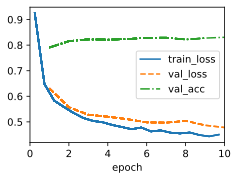

In [24]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

### **4.4.5. 预测（Prediction）**

In [25]:
X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis=1)
preds.shape

torch.Size([256])

我们对我们标记错误的图像更感兴趣。我们通过比较它们的实际标签（文本输出的第一行）和模型的预测（文本输出的第二行），将它们可视化。

In [ ]:
wrong = preds.type(y.dtype) != y
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)

##**4.5. Softmax回归的简洁实现（Concise Implementation of Softmax Regression）**

### **4.5.1. 定义模型（Defining the Model）**

我们使用 `Flatten` 层将四阶张量 `X` 转换为二阶，保持沿第一轴的维度不变。

In [27]:
class SoftmaxRegression(d2l.Classifier):
    def __init__(self, num_outputs, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(),
                                 nn.LazyLinear(num_outputs))
    def forward(self, X):
        return self.net(X)

### **4.5.2. 重新定义Softmax函数（Softmax Revisited）**

In [28]:
@d2l.add_to_class(d2l.Classifier)
def loss(self, Y_hat, Y, averaged=True):
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    Y = Y.reshape((-1,))
    return F.cross_entropy(
        Y_hat, Y, reduction='mean' if averaged else 'none')

### **4.5.3. 训练（Training）**

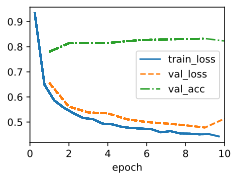

In [29]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegression(num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [30]:
%%shell
jupyter nbconvert --to html 04_D2L_Linear_Neural_Networks_for_Classification.ipynb

[NbConvertApp] Converting notebook 04_D2L_Linear_Neural_Networks_for_Classification.ipynb to html
[NbConvertApp] Writing 643408 bytes to 04_D2L_Linear_Neural_Networks_for_Classification.html
